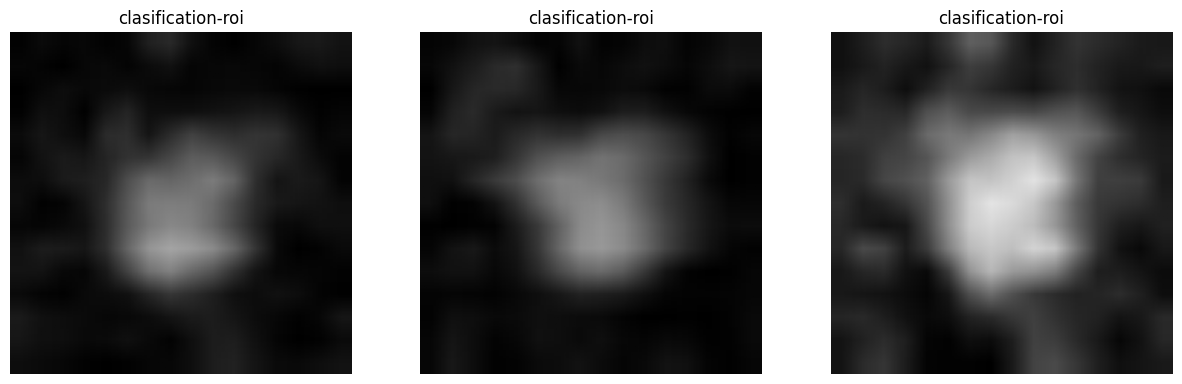

In [13]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader

# Define the transformation for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert images to PyTorch tensors
])

# Load the dataset
dataset = datasets.ImageFolder("C:/infosys_springboard_internship", transform=transform)
class_names = dataset.classes

# Create a DataLoader
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

def display_random_images(data_loader, class_names, num_images=3):
    for class_index, class_name in enumerate(class_names):
        # Filter the dataset for the specific class
        images = []
        labels = []
        for img, label in dataset:
            if label == class_index:
                images.append(img)
                labels.append(label)
            if len(images) == num_images:
                break

        # Display the images
        plt.figure(figsize=(15, 5))
        for i in range(num_images):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # Convert CHW to HWC
            plt.title(class_name)
            plt.axis('off')
        plt.show()

display_random_images(data_loader, class_names)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train Set: Benign = 5559, Malignant = 14875
Test Set: Benign = 1938, Malignant = 4913
Validation Set: Benign = 408, Malignant = 1581


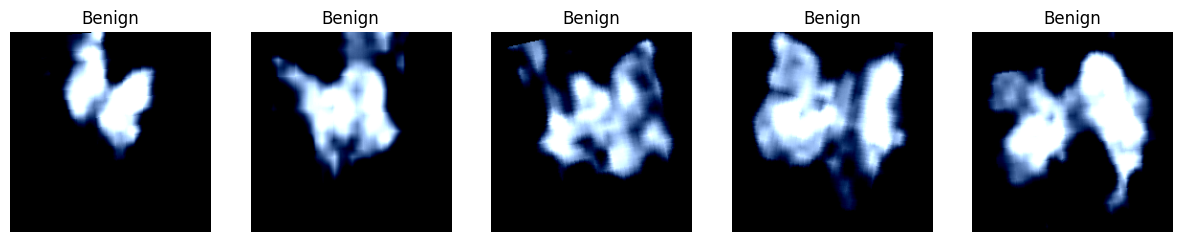

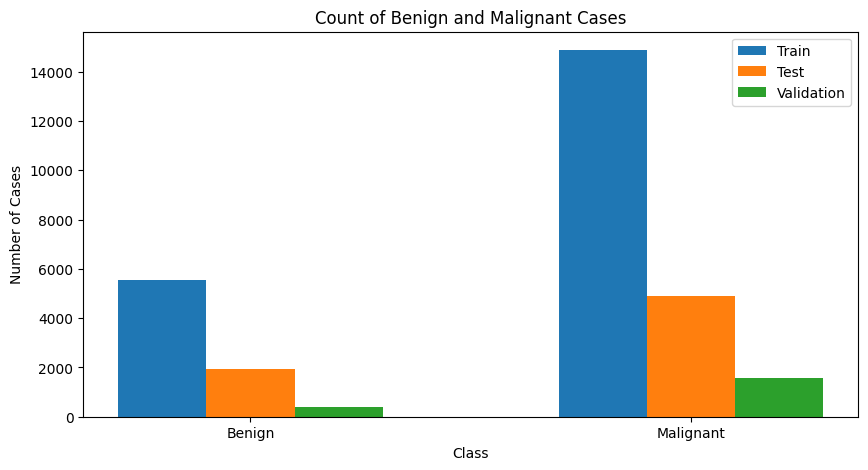

In [14]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the dataset path
dataset_path = "C:\infosys_springboard_internship\clasification-roi"  # Update this to your dataset path

# Define transformations for training dataset
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomCrop(210),  # Randomly crop images to 210x210
    transforms.RandomHorizontalFlip(),  # Horizontal flipping
    transforms.RandomRotation(15),  # Random rotation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

# Define transformations for validation and test datasets
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),  # Random rotation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])


valid_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(15),  # Random rotation
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])


train_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'train'), transform=train_transform)
test_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'test'), transform=test_transform)
valid_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'val'), transform=valid_transform)  # Assuming you have a 'valid' folder


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)


benign_count_train = train_dataset.targets.count(0)  
malignant_count_train = train_dataset.targets.count(1)  
print(f'Train Set: Benign = {benign_count_train}, Malignant = {malignant_count_train}')

benign_count_test = test_dataset.targets.count(0)  
malignant_count_test = test_dataset.targets.count(1)  
print(f'Test Set: Benign = {benign_count_test}, Malignant = {malignant_count_test}')

benign_count_valid = valid_dataset.targets.count(0)  
malignant_count_valid = valid_dataset.targets.count(1)  
print(f'Validation Set: Benign = {benign_count_valid}, Malignant = {malignant_count_valid}')


def display_sample_images(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        image, label = dataset[i]
        plt.subplot(1, num_images, i + 1)
        plt.imshow(image.permute(1, 2, 0).numpy())  # Convert tensor to image format
        plt.title(dataset.classes[label])
        plt.axis('off')
    plt.show()


display_sample_images(train_dataset)


labels = ['Benign', 'Malignant']
train_counts = [benign_count_train, malignant_count_train]
test_counts = [benign_count_test, malignant_count_test]
valid_counts = [benign_count_valid, malignant_count_valid]

x = range(len(labels))

plt.figure(figsize=(10, 5))
plt.bar(x, train_counts, width=0.2, label='Train', align='center')
plt.bar([p + 0.2 for p in x], test_counts, width=0.2, label='Test', align='center')
plt.bar([p + 0.4 for p in x], valid_counts, width=0.2, label='Validation', align='center')

plt.xlabel('Class')
plt.ylabel('Number of Cases')
plt.title('Count of Benign and Malignant Cases')
plt.xticks([p + 0.2 for p in x], labels)
plt.legend()
plt.show()

In [15]:
import torch
from torchvision import models

# Load the pretrained VGG16 model
vgg16 = models.vgg16(pretrained=True)

# Set the model to evaluation mode
vgg16.eval()

# Print the model architecture (optional)
print(vgg16)


c:\Users\thatg\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\thatg\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [16]:
#((shape of width of filter*shape of height filter*number of filters in the previous layer+1)*number of filters)


In [17]:
pip install torch torchvision matplotlib numpy


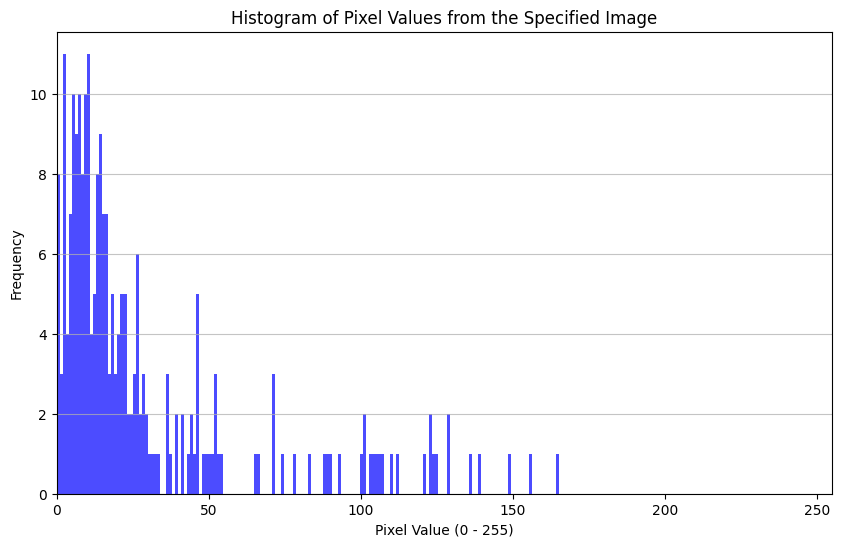

In [18]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# Define the image path
image_path = "C:/infosys_springboard_internship/clasification-roi/test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg"

# Load the image using OpenCV and convert it to grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Convert the image to a numpy array and scale the pixel values to 0-255 range
pixels = image.flatten()

# Plot the histogram of pixel values
plt.figure(figsize=(10, 6))
plt.hist(pixels, bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title("Histogram of Pixel Values from the Specified Image")
plt.xlabel("Pixel Value (0 - 255)")
plt.ylabel("Frequency")
plt.xlim([0, 255])  # Limit x-axis to pixel value range
plt.grid(axis='y', alpha=0.75)
plt.show()


In [19]:
#1. Edge Detection
#2. Corner detection
#3. Blob detection
#4. Texture Analysis
#implement Histogram of oriented gradients

In [20]:
pip install torch torchvision opencv-python-headless matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


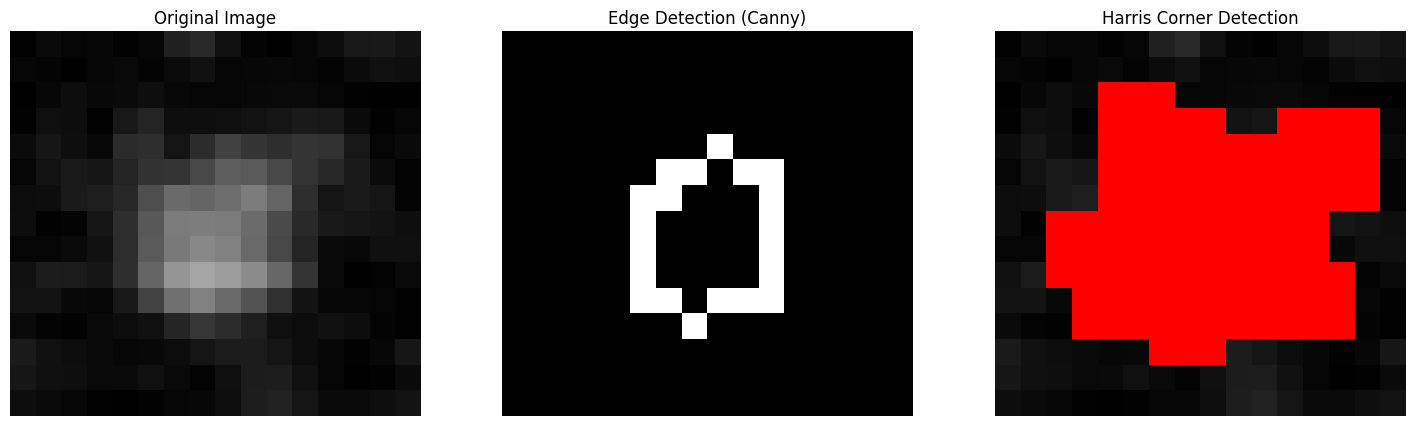

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the image path
image_path = "C:/infosys_springboard_internship/clasification-roi/test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg"

# Load the image using OpenCV and convert it to grayscale
original_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# --------------------- Edge Detection --------------------- #
# Apply Gaussian blur to reduce noise before edge detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Use the Canny edge detector
edges = cv2.Canny(blurred_image, threshold1=100, threshold2=200)

# --------------------- Corner Detection --------------------- #
# Convert to float32 for Harris Corner Detection
gray_float = np.float32(gray_image)

# Apply Harris Corner Detection
harris_corners = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)

# Dilate the result to mark the corners
harris_corners = cv2.dilate(harris_corners, None)

# Threshold for an optimal value and mark the corners in red on the original image
corner_image = original_image.copy()
corner_image[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# --------------------- Display Results --------------------- #
# Show the original, edges, and corners side by side
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

# Edge Detected Image
plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.title("Edge Detection (Canny)")
plt.axis('off')

# Harris Corner Detected Image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(corner_image, cv2.COLOR_BGR2RGB))
plt.title("Harris Corner Detection")
plt.axis('off')

plt.show()


In [24]:
pip install scikit-image


Note: you may need to restart the kernel to use updated packages.


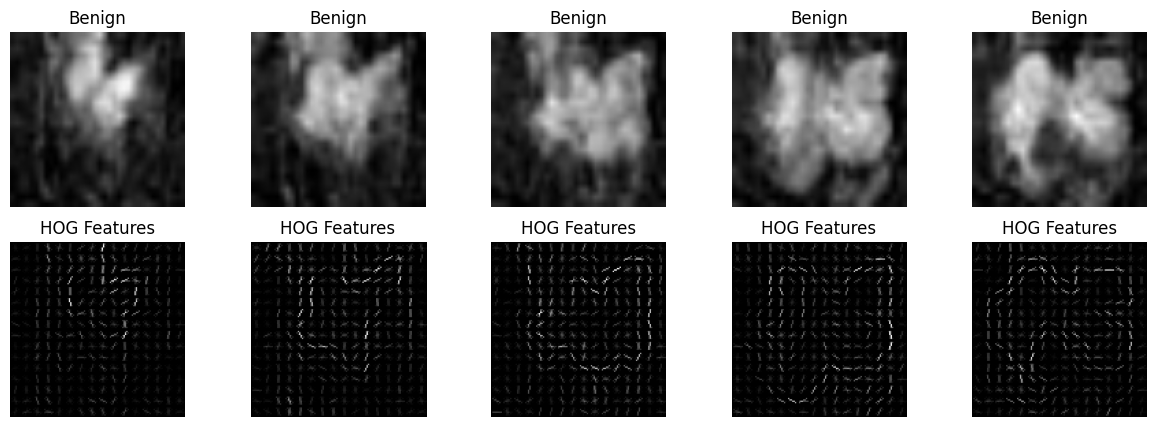

In [25]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from skimage.feature import hog
from skimage import color
import matplotlib.pyplot as plt
import numpy as np

# Define the dataset path
dataset_path = "C:\infosys_springboard_internship\clasification-roi" # Update this to your dataset path

# Define transformations for training dataset (resize images, as HOG operates on fixed-size images)
resize_transform = transforms.Compose([
    transforms.Resize((128, 128)),  # HOG typically works well with smaller images
    transforms.ToTensor()
])

# Load datasets
train_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'train'), transform=resize_transform)
test_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'test'), transform=resize_transform)
valid_dataset = datasets.ImageFolder(root=os.path.join(dataset_path, 'val'), transform=resize_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)

# Function to extract HOG features from a dataset image
def extract_hog_features(image):
    image_np = image.permute(1, 2, 0).numpy()  # Convert tensor to NumPy array
    image_gray = color.rgb2gray(image_np)  # Convert RGB image to grayscale
    hog_features, hog_image = hog(image_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                                  block_norm='L2-Hys', visualize=True, feature_vector=True)
    return hog_features, hog_image

# Display HOG feature for a sample image
def display_hog_sample(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        image, label = dataset[i]
        hog_features, hog_image = extract_hog_features(image)
        plt.subplot(2, num_images, i + 1)
        plt.imshow(image.permute(1, 2, 0).numpy())  # Original image
        plt.title(dataset.classes[label])
        plt.axis('off')

        plt.subplot(2, num_images, i + num_images + 1)
        plt.imshow(hog_image, cmap='gray')  # HOG visualization
        plt.title('HOG Features')
        plt.axis('off')
    plt.show()

# Example of HOG features for training images
display_hog_sample(train_dataset)

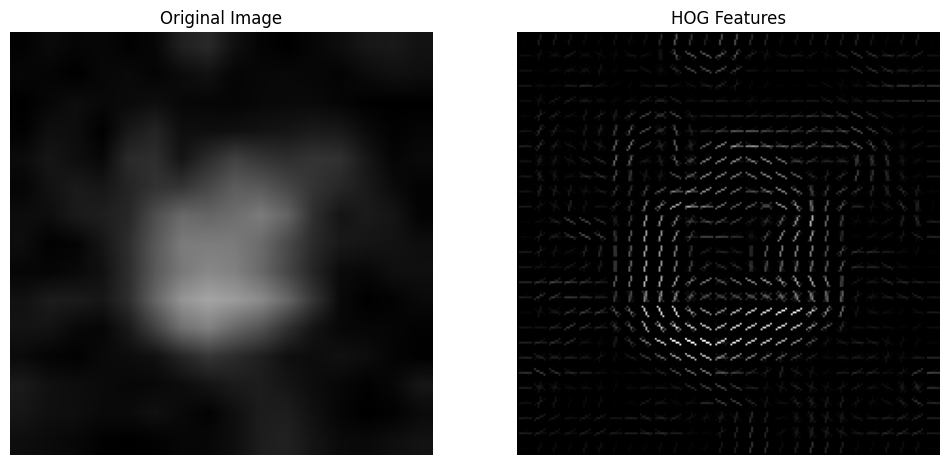

In [27]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import color, exposure

# Function to extract and display HOG features for a single image
def display_hog_for_single_image(image_path):
    # Load the image using OpenCV and convert it to grayscale
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, (224, 224))  # Resize to match the HOG feature extraction scale
    image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
    
    # Compute HOG features and the HOG visualization
    hog_features, hog_image = hog(image_gray, orientations=9, pixels_per_cell=(8, 8), 
                                  cells_per_block=(2, 2), block_norm='L2-Hys', 
                                  visualize=True, feature_vector=True)
    
    # Rescale the HOG image for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    
    # Display the original image and HOG features
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(hog_image_rescaled, cmap='gray')
    plt.title("HOG Features")
    plt.axis('off')

    plt.show()

# Define the path to the specific image
image_path = "C:/infosys_springboard_internship/clasification-roi/test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg"

# Display HOG features for the single image
display_hog_for_single_image(image_path)


In [9]:
pip install pillow matplotlib scipy


Note: you may need to restart the kernel to use updated packages.


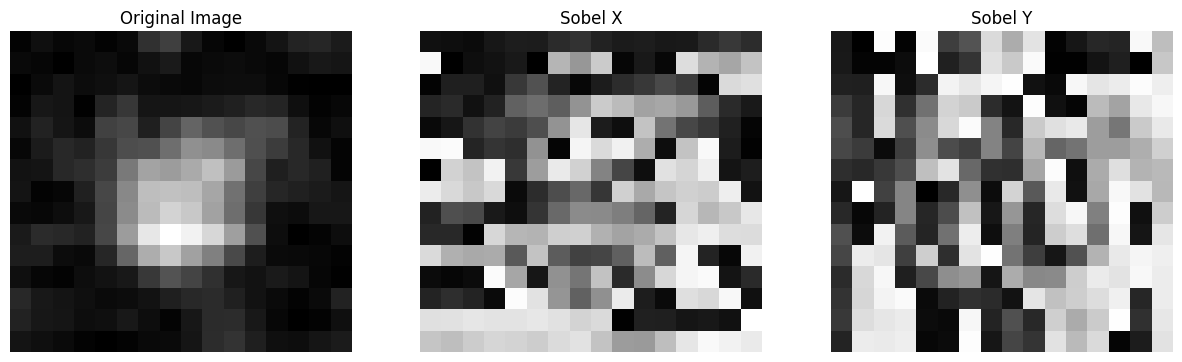

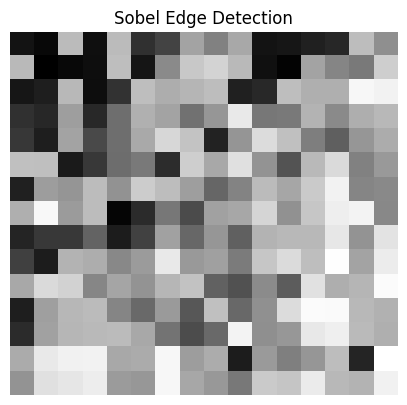

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage

def sobel_operator(image_path):
    # Load the image in grayscale
    image = Image.open(image_path).convert('L')

    # Convert the image to a numpy array
    img_array = np.array(image)

    # Apply Sobel filters to get gradients along x and y directions
    sobel_x = ndimage.sobel(img_array, axis=0, mode='constant')
    sobel_y = ndimage.sobel(img_array, axis=1, mode='constant')

    # Calculate the magnitude of the gradient
    sobel_magnitude = np.hypot(sobel_x, sobel_y)
    sobel_magnitude = (sobel_magnitude / sobel_magnitude.max()) * 255  # Normalize to 0-255

    # Convert to uint8
    sobel_magnitude = sobel_magnitude.astype(np.uint8)

    # Display the images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(sobel_x, cmap='gray')
    plt.title('Sobel X')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(sobel_y, cmap='gray')
    plt.title('Sobel Y')
    plt.axis('off')

    plt.figure(figsize=(5, 5))
    plt.imshow(sobel_magnitude, cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.axis('off')
    plt.show()


    

# Use the function with the image path
sobel_operator("C:/infosys_springboard_internship/clasification-roi/test/Benign/BreaDM-Be-1810/SUB1/p-030.jpg")


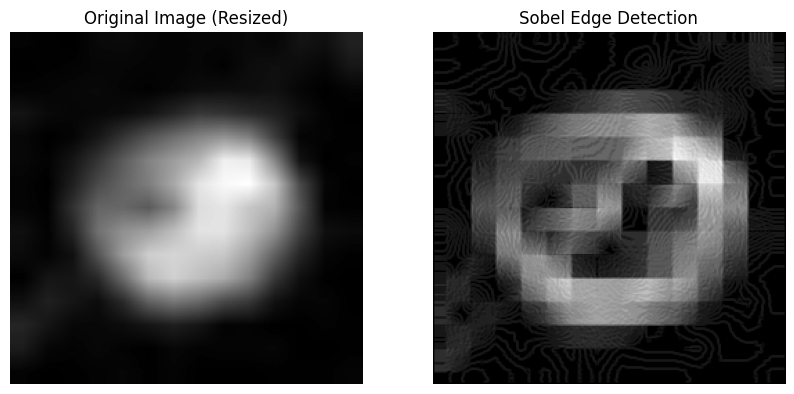

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def sobel_operator(image):
    # Define Sobel kernels
    Kx = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])

    Ky = np.array([[1, 2, 1],
                   [0, 0, 0],
                   [-1, -2, -1]])

    # Get image dimensions
    rows, cols = image.shape
    
    # Create empty arrays for gradients
    Ix = np.zeros((rows, cols), dtype=np.float32)
    Iy = np.zeros((rows, cols), dtype=np.float32)
    G = np.zeros((rows, cols), dtype=np.float32)

    # Apply Sobel filters
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Calculate gradient in x direction
            Ix[i, j] = (Kx[0, 0] * image[i - 1, j - 1] + Kx[0, 1] * image[i - 1, j] + Kx[0, 2] * image[i - 1, j + 1] +
                         Kx[1, 0] * image[i, j - 1] + Kx[1, 1] * image[i, j] + Kx[1, 2] * image[i, j + 1] +
                         Kx[2, 0] * image[i + 1, j - 1] + Kx[2, 1] * image[i + 1, j] + Kx[2, 2] * image[i + 1, j + 1])
            
            # Calculate gradient in y direction
            Iy[i, j] = (Ky[0, 0] * image[i - 1, j - 1] + Ky[0, 1] * image[i - 1, j] + Ky[0, 2] * image[i - 1, j + 1] +
                         Ky[1, 0] * image[i, j - 1] + Ky[1, 1] * image[i, j] + Ky[1, 2] * image[i, j + 1] +
                         Ky[2, 0] * image[i + 1, j - 1] + Ky[2, 1] * image[i + 1, j] + Ky[2, 2] * image[i + 1, j + 1])

    # Calculate the magnitude of the gradient
    for i in range(rows):
        for j in range(cols):
            G[i, j] = np.sqrt(Ix[i, j]**2 + Iy[i, j]**2)

    # Normalize the gradient image to the range [0, 255]
    G = (G / G.max()) * 255
    G = G.astype(np.uint8)

    return G

# Load the image using OpenCV
image_path = './clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale

# Check if the image is loaded properly
if image is None:
    print("Error loading image!")
else:
    # Resize the image to 255x255
    image = cv2.resize(image, (255, 255))

    sobel_image = sobel_operator(image)
    
    # Display the images using matplotlib
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image (Resized)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(sobel_image, cmap='gray')
    plt.title('Sobel Edge Detection')
    plt.axis('off')

    plt.show()


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def local_binary_pattern(image_path):
    # Load the image in grayscale using OpenCV
    img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Get the dimensions of the image
    rows, cols = img_array.shape

    # Initialize the LBP output array
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    # Loop over the image, skipping the border pixels
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Extract the 3x3 neighborhood
            #skips the outermost pixels
            surr = img_array[i-1:i+2, j-1:j+2]
            
            # Define the center pixel
            center = surr[1, 1]
            
            # Initialize the binary pattern
            binary_pattern = 0

            # Create the binary pattern by comparing with the center pixel
            for ind, (dy, dx) in enumerate([(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]):
                if surr[1 + dy, 1 + dx] >= center:
                    binary_pattern += 2 ** ind
            
            # Set the LBP value for the current pixel
            lbp_image[i, j] = binary_pattern

    # Normalize the LBP image for display
    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255

    # Display the original and LBP images
    plt.figure(figsize=(224, 224))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('Local Binary Pattern (LBP)')
    plt.show()

# Example usage
local_binary_pattern('./clasification-roi/test/Benign/BreaDM-Be-1813/SUB2/p-017.jpg')
